In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
import scipy.stats
from scipy.stats import ks_2samp,kstest


In [4]:
file = 'sample.xlsx'
xl = pd.ExcelFile(file)
df1 = xl.parse('Sample')



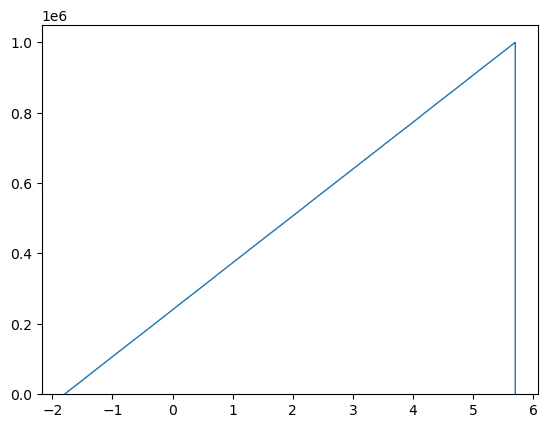

In [5]:
plt.hist(df1['sample'], histtype='step', cumulative=True, bins=len(sorted(df1['sample']))) 
plt.show()

In [6]:
#Пока мы знаем что у нас равномерно распределённая случайная величина. Проверим a и b
print(max(df1['sample']))
print(min(df1['sample']))

5.699998877070883
-1.799991528355763


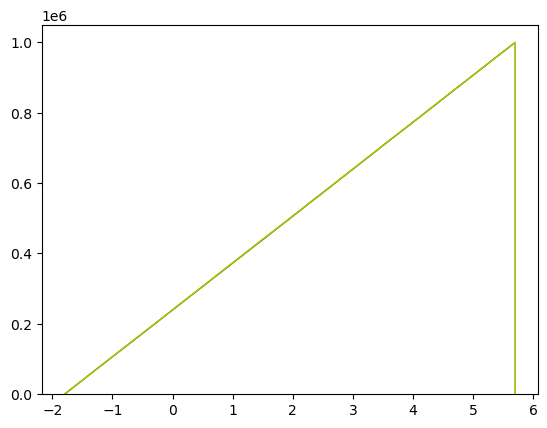

In [7]:

z = np.random.uniform(-1.8,5.7,1000000)
plt.hist(z, histtype='step', cumulative=True, bins=len(z),color ='g') 
plt.hist(df1['sample'], histtype='step', cumulative=True, bins=len(sorted(df1['sample'])),color = 'y') 
plt.show()

In [8]:
data = df1['sample']
#Kolmogorov-Smirnov test
A=[]
for i in range(len(data)):
    A.append(data[i])

kstest(A, lambda x: scipy.stats.uniform.cdf(x,-1.8,7.5))
#p-value > 0.05 значит данные выборки имеют равномерное распределение
#KstestResult(statistic=0.0008029999999999982, pvalue=0.9035655021682063)

KstestResult(statistic=0.0005899076439792039, pvalue=0.8771463285105248)

### Высчитываем OMM

In [50]:
from collections import defaultdict
from math import sqrt
#можно было конечно и mean использовать но было интересно посчитать
def Ex(data):
    counter = defaultdict(float)
    
    for elem in data:
        counter[elem] += 1
    print(counter)
    s = 0 
    for i in counter.keys():
        s+=i*counter[i]
    return s/len(data)

def Dx(data):
    E = Ex(data)
    counter = defaultdict(float)
    for elem in data:
        counter[elem] += 1
    s = 0 
    for i in counter.keys():
        s+=((i)**2)*counter[i]
        
    return s/len(data)-E*E

#Решаем систему a+b/2 = Ex, (b-a)^2/12 = Dx
a = 97/50-3*sqrt(39)/5
b = 97/50+3*sqrt(39)/5
print(a,b,max(data),min(data))  

-1.8069987990390395 5.686998799039039 5.699998877070883 -1.799991528355763


#### получились оценки в точности те, которые мы видим на гистограмме

### ОМП для нашего распределения будет a = min(x1,x2,...,xn), b = max(x1,x2,x3,...,xn)
#### В моем случае получилось, что омм и омп совпали

In [10]:
print(a,b)

-1.8069987990390395 5.686998799039039


### Состоятельность


In [41]:
slice = data
A_omm = []
B_omm= []
A_omp = []
B_omp= []

E = np.cumsum(data)/np.arange(1,1000001)
D = np.cumsum(data**2)/np.arange(1,1000001)-E**2
b_ = (8*E+np.sqrt(64*E**2-16*(4*E**2-12*D)))/8
a_ = 2*E-b_

In [42]:
a = [5.7]*100000

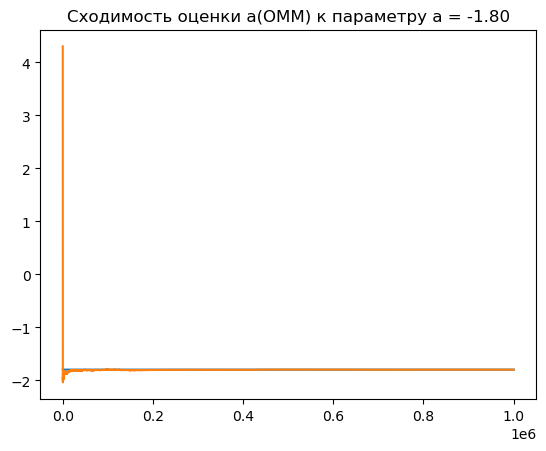

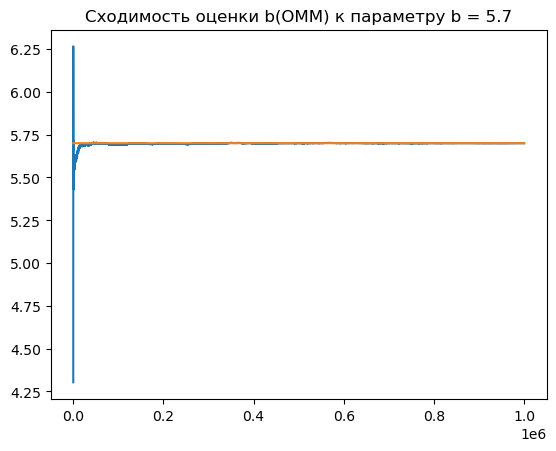

In [43]:
plt.plot([-1.8]*1000000)
plt.plot(a_)
plt.title("Сходимость оценки a(ОММ) к параметру a = -1.80")
plt.show()
plt.plot(b_)
plt.plot([5.7]*1000000)
plt.title("Сходимость оценки b(ОММ) к параметру b = 5.7")
plt.show()


### Асимптотическая нормальность

#### Разделим выборку на 1000 выборок 

In [44]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
slicers = []
slicers= [*chunks(data,2000)] # при выборке в 1000 возникает мусор

In [45]:
def ANO_for_a(data):
    E = Ex(data)
    D = Dx(data)
    b = (8*E+sqrt(64*E**2-16*(4*E**2-12*D)))/8
    a = 2*E-b
    return sqrt(2000)*(a+1.8)
A_OMM = []
for i in range(500):
    A_OMM.append(ANO_for_a(slicers[i]))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



defaultdict(<class 'float'>, {2.147694198844533: 1.0, -0.7009169058856901: 1.0, -1.640742350712009: 1.0, 1.358013134010996: 1.0, 2.541947833270235: 1.0, 3.201725943831265: 1.0, 0.243983543650329: 1.0, 3.350748313085597: 1.0, 1.900252683860178: 1.0, -1.547003090639625: 1.0, 3.678138393662733: 1.0, 1.711658043719594: 1.0, 3.817235335848981: 1.0, 1.261592222505594: 1.0, 1.676758979806994: 1.0, 0.4971944753695385: 1.0, 2.603015579917606: 1.0, 2.077385694074441: 1.0, 3.955833415813634: 1.0, -0.3513354606296977: 1.0, -0.8651947493703609: 1.0, 3.711116993555104: 1.0, 1.387361506929888: 1.0, 2.598257483532297: 1.0, -1.06927649528535: 1.0, 5.277685996520194: 1.0, 1.498331944679129: 1.0, 2.087968172347404: 1.0, 2.989028264405864: 1.0, 5.538106301539746: 1.0, 0.8575291886934291: 1.0, 5.499452299765064: 1.0, 5.143995271577029: 1.0, -0.3079032030956801: 1.0, 5.090931760419548: 1.0, -1.598135858824974: 1.0, 1.796446374595749: 1.0, 2.149874882859142: 1.0, 1.106449630722995: 1.0, 1.17753656945537: 1.0

#### Построим гистограмму

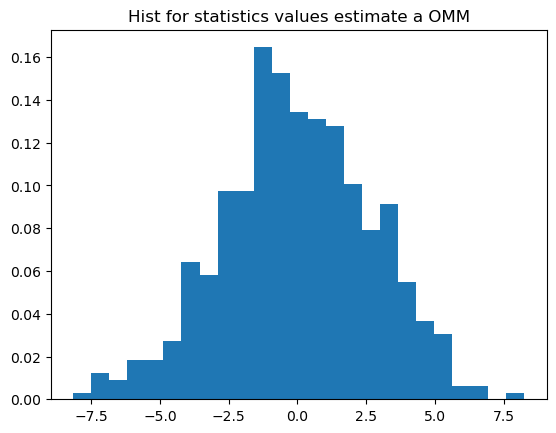

In [46]:
plt.hist(A_OMM,density=True,bins=25)
plt.title("Hist for statistics values estimate a OMM")
plt.show()


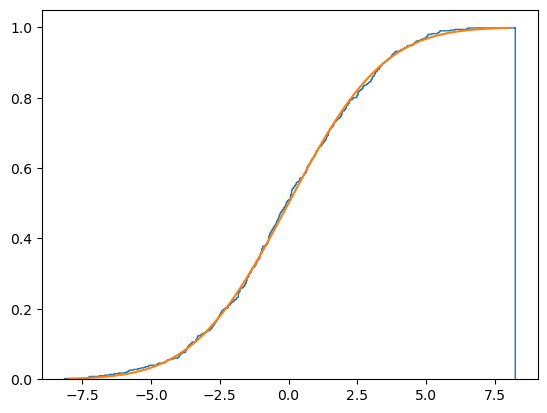

In [47]:
plt.hist(A_OMM, histtype='step', cumulative=True, bins=len(sorted(df1['sample'])),density = True) 

plt.plot(np.arange(-8,8,0.001),[scipy.stats.norm.cdf(x,0,2.72) for x in np.arange(-8,8,0.001)])
plt.show()

#### Гистограмма похожа на нормальное распределение оценим дисперсию и проведем Калмогоров тест

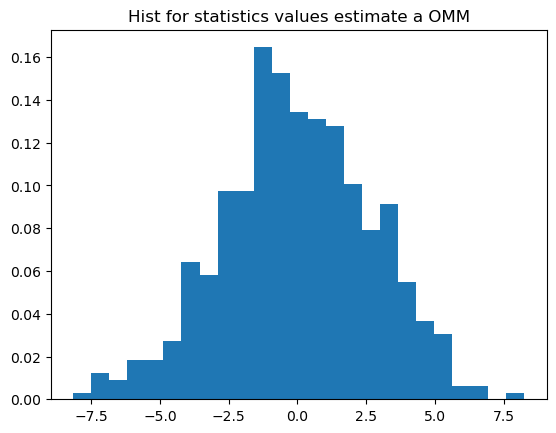

In [55]:

plt.hist(A_OMM,density=True,bins=25)
plt.title("Hist for statistics values estimate a OMM")
plt.show()

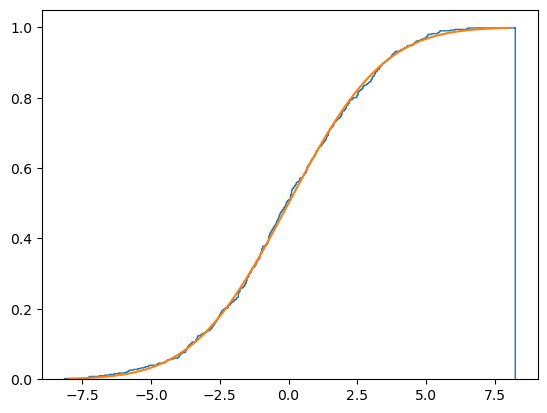

In [56]:
plt.hist(A_OMM, histtype='step', cumulative=True, bins=len(sorted(df1['sample'])),density = True) 

plt.plot(np.arange(-8,8,0.001),[scipy.stats.norm.cdf(x,0,2.72) for x in np.arange(-8,8,0.001)])
plt.show()

In [57]:
import scipy.stats
from scipy.stats import kstest
kstest(A_OMM,lambda x : scipy.stats.norm.cdf(x,0,sqrt(D)))

KstestResult(statistic=0.020811599616909593, pvalue=0.9788582977951337)

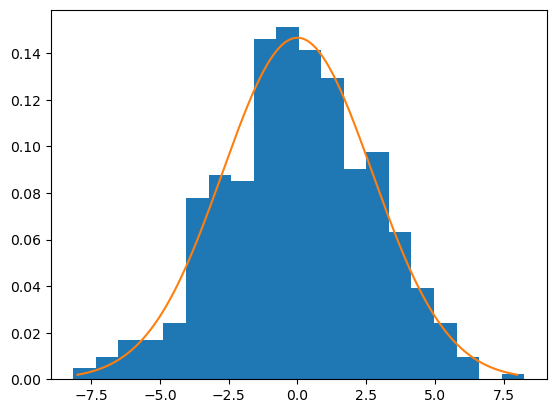

In [58]:
plt.hist(A_OMM,density=True,bins=20)
plt.plot(np.arange(-8,8,0.001),scipy.stats.norm.pdf(np.arange(-8,8,0.001),0,2.72))
plt.show()


#### Проделаем тоже самое для параметра b

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



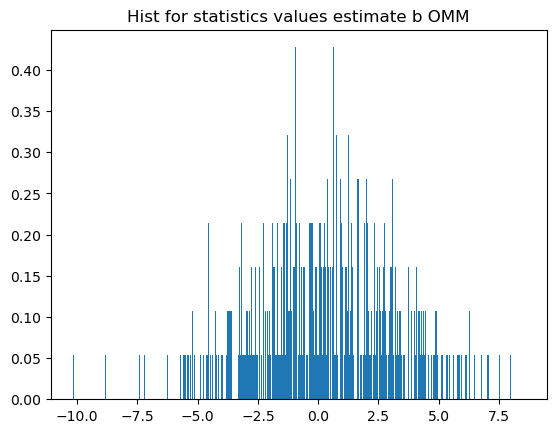

In [59]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
slicers = []
slicers= [*chunks(data,1000)] # при выборке в 1000 возникает мусор

def ANO_for_b(data):
    E = Ex(data)
    D = Dx(data)
    b = (8*E+sqrt(64*E**2-16*(4*E**2-12*D)))/8
    return sqrt(len(data))*(b-5.69)
B_OMM = []
for i in range(1000):
    B_OMM.append(ANO_for_b(slicers[i]))
plt.hist(B_OMM,density=True,bins=len(B_OMM))
plt.title("Hist for statistics values estimate b OMM")
plt.show()

In [63]:
import scipy.stats
from scipy.stats import kstest
kstest(B_OMM,lambda x : scipy.stats.norm.cdf(x,0,sqrt(D)))


KstestResult(statistic=0.037592648799413264, pvalue=0.11546501831576095)

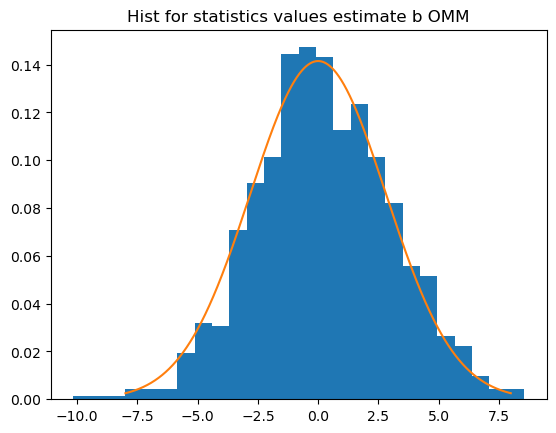

In [72]:
plt.hist(B_OMM,density=True,bins=26)
plt.title("Hist for statistics values estimate b OMM")
plt.plot(np.arange(-8,8,0.001),scipy.stats.norm.pdf(np.arange(-8,8,0.001),0,2.82))
plt.show()
plt.show()

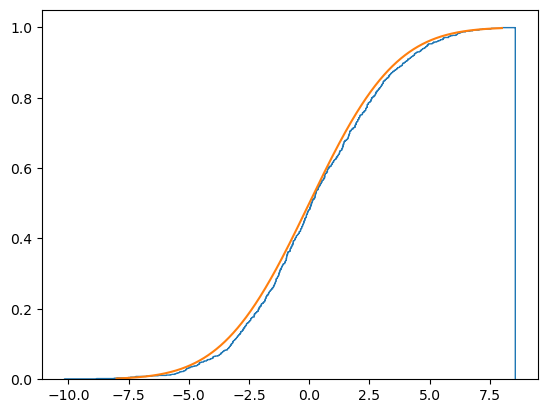

In [74]:
plt.hist(B_OMM, histtype='step', cumulative=True, bins=len(sorted(df1['sample'])),density = True) 

plt.plot(np.arange(-8,8,0.001),[scipy.stats.norm.cdf(x,0,2.82) for x in np.arange(-8,8,0.001)])
plt.show()

In [ ]:
#### Проверим оценки ОМП

In [ ]:
slicers= [*chunks(data,1000)]
def ANO_OMP(data,flag):
    if flag == 1: 
        return sqrt(len(data))*(max(data)-5.69)
    else:
        return sqrt(len(data))*(min(data)+1.8)
A_OMP = []
B_OMP = []
for i in range(1000):
    B_OMP.append(ANO_OMP(slicers[i],1))
    A_OMP.append(ANO_OMP(slicers[i],0))
plt.hist(B_OMP,density=True,bins=len(B_OMP))
plt.title("Hist for statistics values estimate b OMP")
plt.show()
plt.hist(A_OMP,density=True,bins=len(A_OMP))
plt.title("Hist for statistics values estimate a OMP")
plt.show()

#### Получается что даже исходя из графиков оценки ОМП не Асимптотически нормальные

### Доверительный интервал

#### Построить асимптотические доверительные интервалы уровней доверия 0.95 и 0.99. Рекомендуется использовать теорему о построении асимптотических доверительных интервалов с помощью асимптотически нормальных оценок (нам ведь по крайней мере одна такая оценка известна?).

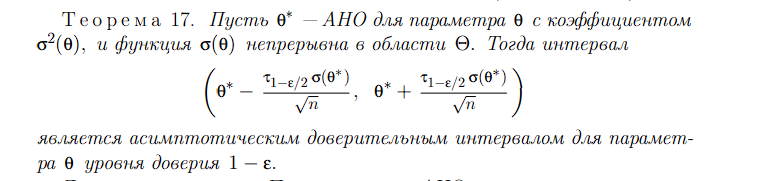

#### АНО у нас оценки ОММ 

In [ ]:
epsilon = [1-0.95,1-0.99]
k_1 = 1-epsilon[0]/2
k_2 = 1-epsilon[1]/2
print(k_1,k_2)


In [ ]:
kvantil_0_975= 1.959963986 
kvantil_0_995= 2.575829306 

                                                      